<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P4_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 4**

## **LANGKAH 0: UNDUH DATASET**

In [1]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from time import time
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print("Sedang mengunduh/memuat dataset LFW People...")
# Mengunduh dataset wajah Labeled Faces in the Wild (LFW)
# Hanya mengambil orang yang memiliki minimal 60 gambar wajah
faces = fetch_lfw_people(min_faces_per_person=60)

print("\n--- Informasi Dataset ---")
print(f"Target Names (Label): {faces.target_names}")
print(f"Jumlah Kelas: {len(faces.target_names)}")
print(f"Dimensi Gambar: {faces.images.shape}")

Sedang mengunduh/memuat dataset LFW People...

--- Informasi Dataset ---
Target Names (Label): ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
Jumlah Kelas: 8
Dimensi Gambar: (1348, 62, 47)


Bagian ini menampilkan dimensi data yang digunakan. faces.images.shape biasanya menghasilkan output seperti (1348, 62, 47), yang berarti terdapat 1.348 sampel gambar, dengan setiap gambar memiliki resolusi tinggi piksel 62x47. Daftar nama target menunjukkan label siapa saja yang ada dalam dataset (misal: Ariel Sharon, Colin Powell, dst).

## **LANGKAH 1: INSPEKSI CITRA WAJAH**

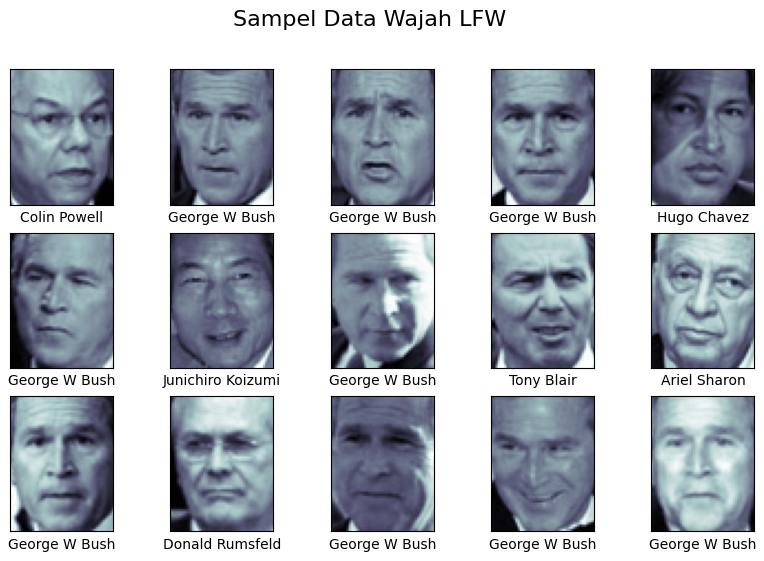

In [3]:
# Menampilkan 15 contoh wajah pertama dari dataset
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.suptitle("Sampel Data Wajah LFW", fontsize=16)
plt.show()

Plot ini menampilkan 15 citra wajah pertama dalam skala abu-abu (grayscale). Visualisasi ini berfungsi untuk memastikan data telah terunduh dengan benar dan memberikan gambaran mengenai variasi pencahayaan, posisi wajah, dan ekspresi yang akan dipelajari oleh model.

## **LANGKAH 2 & 3: PREPROCESSING (PCA) & SPLIT DATA**

In [4]:
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Membuat pipeline: Input -> PCA -> SVM
model = make_pipeline(pca, svc)

# Split data training dan testing
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## **LANGKAH 4: GRID SEARCH (TUNING)**

In [5]:
print("\nSedang melakukan Grid Search (Training)...")
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

# Mencatat waktu eksekusi
start_time = time()
grid.fit(Xtrain, ytrain)
end_time = time()

print(f"Waktu Training: {end_time - start_time:.2f} detik")
print(f"Parameter Terbaik: {grid.best_params_}")
print(f"Skor Terbaik (CV): {grid.best_score_:.4f}")

# Mengambil model terbaik
model_best = grid.best_estimator_


Sedang melakukan Grid Search (Training)...
Waktu Training: 83.72 detik
Parameter Terbaik: {'svc__C': 5, 'svc__gamma': 0.001}
Skor Terbaik (CV): 0.8289


Bagian ini menampilkan parameter optimal yang ditemukan oleh algoritma. Output best_params_ (biasanya {'svc__C': 5, 'svc__gamma': 0.001}) menunjukkan konfigurasi hyperparameter SVM yang menghasilkan akurasi validasi silang (cross-validation) tertinggi. Waktu eksekusi ditampilkan untuk memberikan gambaran beban komputasi.

## **LANGKAH 5: PREDIKSI & VISUALISASI HASIL**

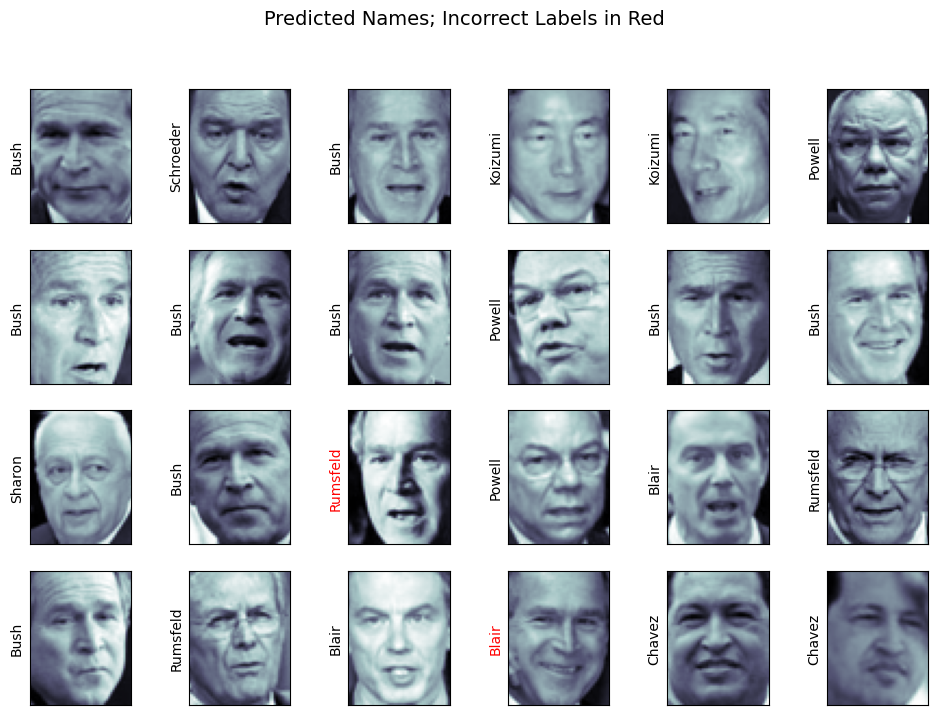

In [6]:
yfit = model_best.predict(Xtest)

# Menampilkan hasil prediksi pada data testing
# Teks merah = Prediksi Salah, Teks Hitam = Prediksi Benar
fig, ax = plt.subplots(4, 6, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

Plot ini menampilkan wajah-wajah dari data uji (Xtest) beserta label prediksinya.

* Label Hitam: Menandakan model memprediksi nama orang tersebut dengan benar.

* Label Merah: Menandakan model memprediksi nama orang tersebut dengan salah. Visualisasi ini membantu dalam analisis kualitatif untuk melihat pada kondisi gambar seperti apa model mengalami kegagalan (misalnya gambar terlalu gelap atau wajah tertutup aksesoris).

## **LANGKAH 6: EVALUASI PERFORMA**


--- Classification Report ---
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337


--- Confusion Matrix ---


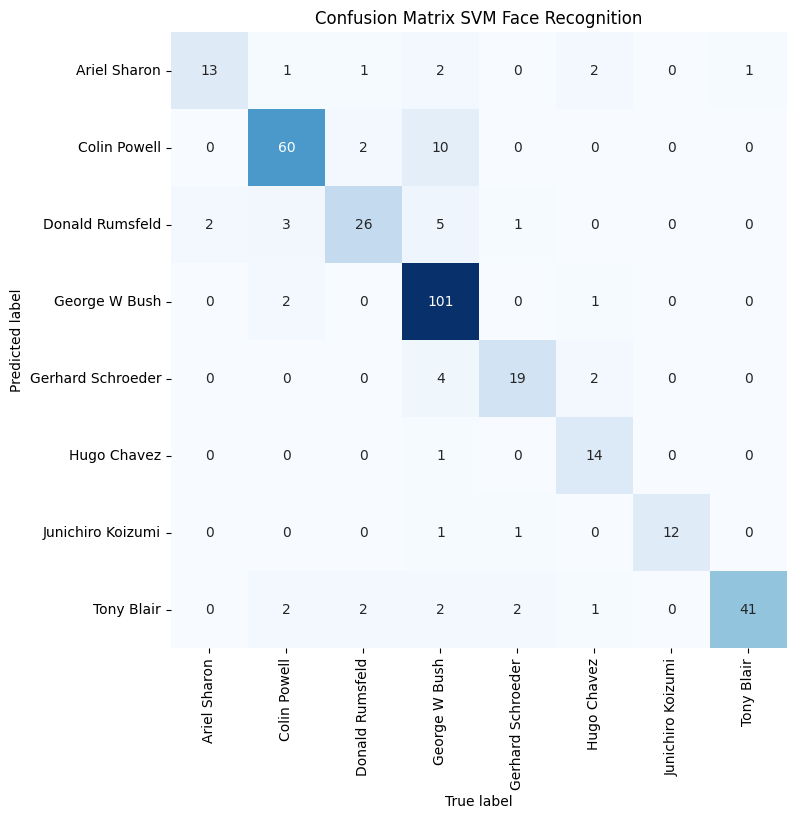

In [7]:
print("\n--- Classification Report ---")
print(classification_report(ytest, yfit, target_names=faces.target_names))

print("\n--- Confusion Matrix ---")
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix SVM Face Recognition")
plt.show()

Grafik ini memetakan hubungan antara Label Asli (True Label) pada sumbu X dan Label Prediksi (Predicted Label) pada sumbu Y.

* Angka di diagonal utama (kotak yang lebih gelap) menunjukkan jumlah prediksi yang benar.

* Angka di luar diagonal menunjukkan kesalahan prediksi. Contohnya, jika pada baris "George W Bush" dan kolom "Tony Blair" terdapat angka, berarti ada gambar Bush yang salah diprediksi sebagai Blair. Grafik ini memperjelas pasangan kelas mana yang paling sering membuat model "bingung".